# Stock Market Analysis

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import pandas_datareader as pdr
from pandas_datareader import data, wb

from datetime import datetime

from __future__ import division

In [2]:
tech_list = ['GOOG','AMZN', 'AAPL', 'MSFT']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


for stock in tech_list:   
    globals()[stock] = data.get_data_yahoo(stock,start,end)

In [3]:
AAPL.info()
AAPL.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 257
Data columns (total 7 columns):
date        254 non-null object
high        254 non-null float64
low         254 non-null float64
open        254 non-null float64
close       254 non-null float64
volume      254 non-null float64
adjclose    254 non-null float64
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


,date,high,low,open,close,volume,adjclose
0,2018-03-29,171.750000,166.899994,167.804993,170.529999,23645931.0,170.529999
1,2018-03-28,170.020004,165.190002,167.250000,166.479996,41428800.0,166.479996
2,2018-03-27,175.149994,166.919998,173.679993,168.339996,40922600.0,168.339996
3,2018-03-26,173.100006,166.440002,168.070007,172.770004,37541200.0,172.770004
4,2018-03-23,169.919998,164.940002,168.389999,164.940002,41028800.0,164.940002


## - historical view of the closing price

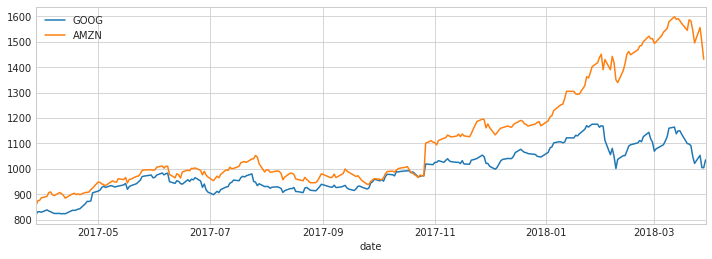

In [4]:
fig_size=(12,4)

fig, ax1 = plt.subplots()

GOOG.plot('date', 'adjclose', figsize=fig_size, ax=ax1)
AMZN.plot('date', 'adjclose', figsize=fig_size, ax=ax1)

plt.legend(['GOOG','AMZN'])
plt.show()

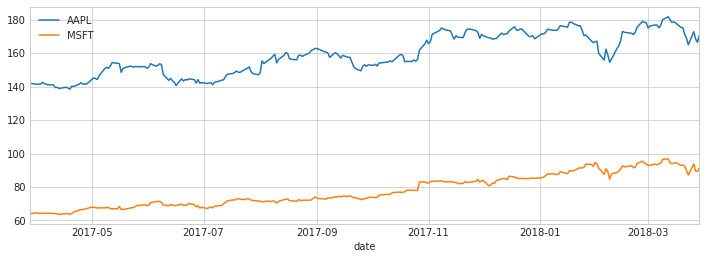

In [5]:
fix, ax1 = plt.subplots()

AAPL.plot('date', 'adjclose', figsize=(12,4), ax=ax1)
MSFT.plot('date', 'adjclose', figsize=(12,4), ax=ax1)

plt.legend(['AAPL','MSFT'])
plt.show()

## - covariation and correlation between  closing price for companies

In [6]:
adjclose_df = pd.concat([GOOG['adjclose'], AMZN['adjclose'], AAPL['adjclose'], MSFT['adjclose']], axis=1)
adjclose_df.columns = tech_list
adjclose_df.cov()

,GOOG,AMZN,AAPL,MSFT
GOOG,7442.577530,15276.044846,879.198652,766.666033
AMZN,15276.044846,40955.836971,1872.852648,1781.405056
AAPL,879.198652,1872.852648,146.637357,105.965997
MSFT,766.666033,1781.405056,105.965997,91.458572


In [7]:
adjclose_df.corr()

,GOOG,AMZN,AAPL,MSFT
GOOG,1.000000,0.874966,0.844703,0.933478
AMZN,0.874966,1.000000,0.768824,0.927171
AAPL,0.844703,0.768824,1.000000,0.908727
MSFT,0.933478,0.927171,0.908727,1.000000


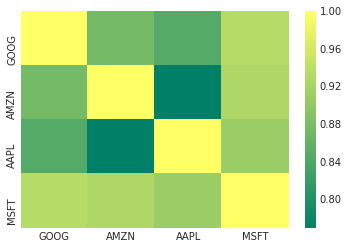

In [8]:
sns.heatmap(adjclose_df.corr(), cmap='summer')

## - total volume of stock being traded each month

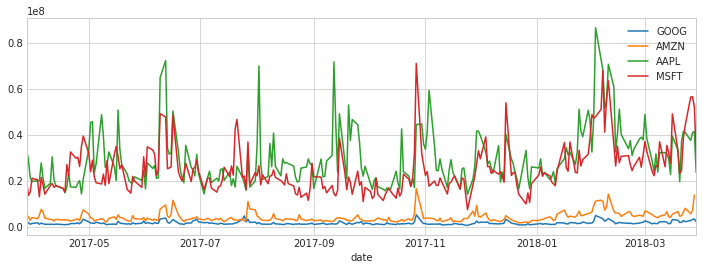

In [9]:
fig, ax1 = plt.subplots()

GOOG.plot('date', 'volume', legend=True, figsize=fig_size, ax=ax1)
AMZN.plot('date', 'volume', legend=True, figsize=fig_size, ax=ax1)
AAPL.plot('date', 'volume', legend=True, figsize=fig_size, ax=ax1)
MSFT.plot('date', 'volume', legend=True, figsize=fig_size, ax=ax1)

plt.legend(tech_list)
plt.show()



## - moving average to AAPL stocks closing price

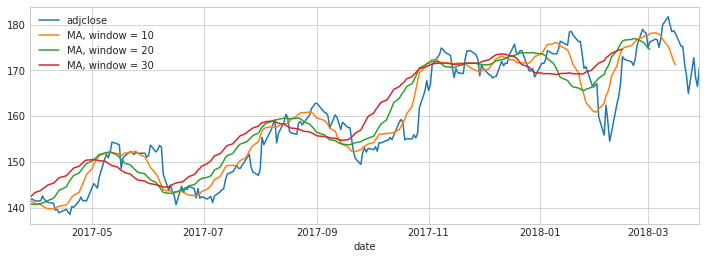

In [10]:
# pd.rolling_mean(GOOG['adjclose'],window=10)
# GOOG['adjclose'].rolling_mean()

windows = [10, 20, 30]
mv_av_dframe = DataFrame(AAPL[['date','adjclose']])


for win in windows:
    col_name = 'MA, window = ' + str(win)
    mv_av_dframe[col_name] = AAPL['adjclose'].rolling(window=win).mean()


mv_av_dframe.plot(x='date', figsize=fig_size)


## - daily percent change of AAPL stocks closing price

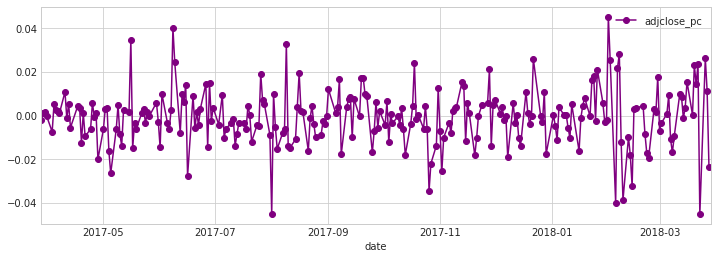

In [11]:
AAPL['adjclose_pc'] = AAPL['adjclose'].pct_change()
AAPL.plot(x='date', y='adjclose_pc', figsize=fig_size, marker='o', color = 'purple')

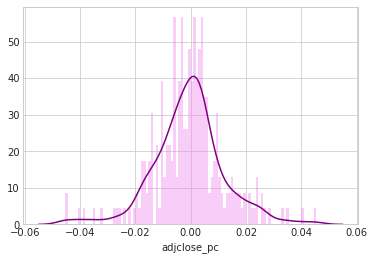

In [12]:
sns.distplot(AAPL['adjclose_pc'].dropna(), bins = 100, kde_kws = {'color':'purple'}, hist_kws = {'color':'violet'})

## - correlations between daily percent change of  'GOOG','AMZN', 'AAPL', 'MSFT' stocks closing price 

In [13]:
close_df_pct = adjclose_df.pct_change()
close_df_pct.dropna(inplace=True)
close_df_pct.head()

,GOOG,AMZN,AAPL,MSFT
1,-0.029758,0.000000,-0.023750,-0.021349
2,0.000538,0.045850,0.011173,0.000895
3,0.047866,0.039284,0.026316,0.048173
4,-0.030041,-0.038757,-0.045320,-0.070377
5,0.026929,0.033004,0.023706,0.029938


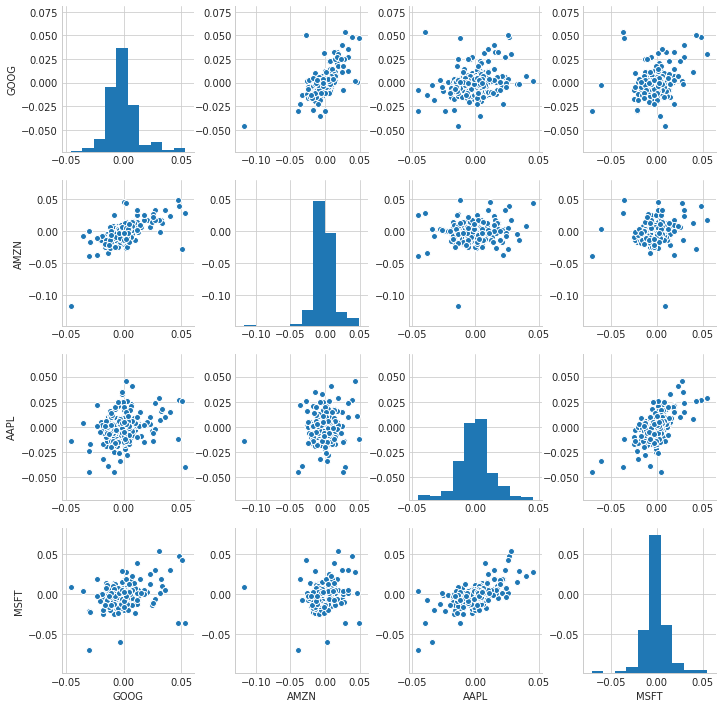

In [14]:
sns.pairplot(close_df_pct)

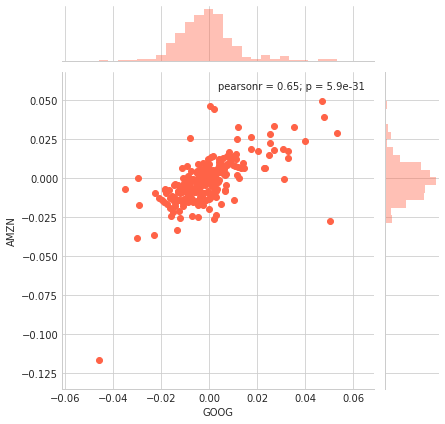

In [15]:
sns.jointplot(close_df_pct.GOOG, close_df_pct.AMZN, color = 'tomato')

/home/anna/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


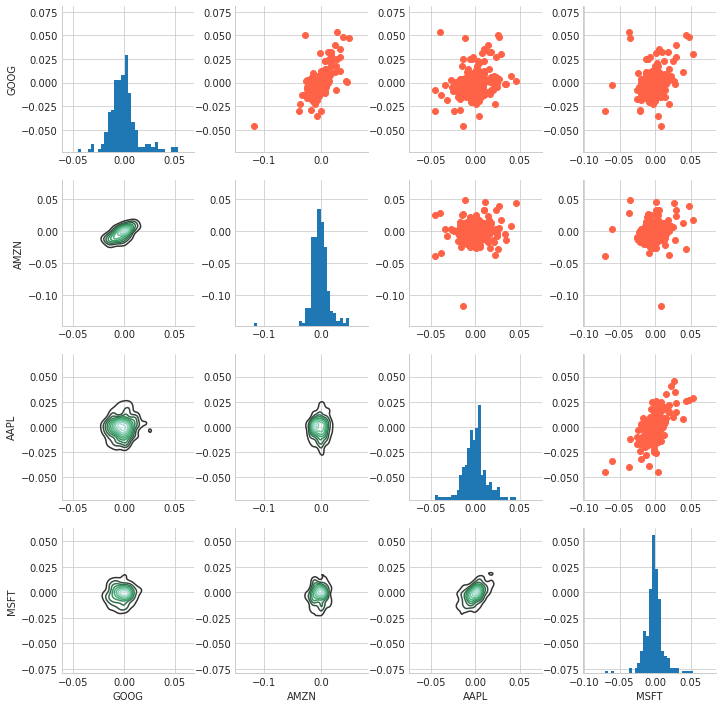

In [16]:
fig = sns.PairGrid(close_df_pct)

fig.map_upper(plt.scatter, color='tomato')
fig.map_lower(sns.kdeplot)
fig.map_diag(plt.hist,bins=30)

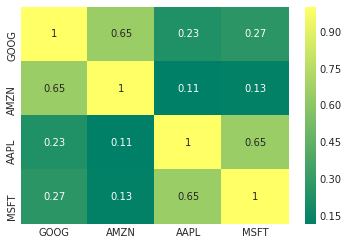

In [17]:
sns.heatmap(close_df_pct.corr(), cmap='summer', annot=True)

## Risk Analysis

## - expected pct change and std deviation for percent change of 'GOOG','AMZN', 'AAPL', 'MSFT' stocks closing price

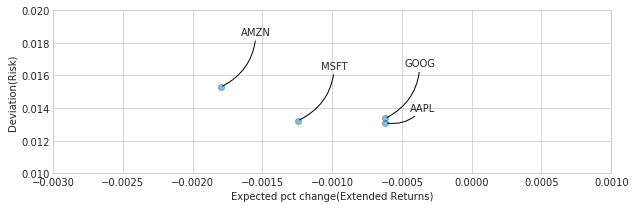

In [18]:
plt.figure(figsize=(10,3))
plt.scatter(close_df_pct.mean() , close_df_pct.std(), alpha = 0.5 )
plt.ylim([0.01,0.02])
plt.xlim([-0.003,0.001])


plt.xlabel('Expected pct change(Extended Returns)')
plt.ylabel('Deviation(Risk)')



for label, x, y in zip(close_df_pct.columns, close_df_pct.mean(), close_df_pct.std()):
    xy_text = (50, 50)
    if label == 'AAPL':
        xy_text = (50, 10)
    plt.annotate(
        label, xy = (x, y), xytext = xy_text,
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

## - value at risk (amount that could be lost)

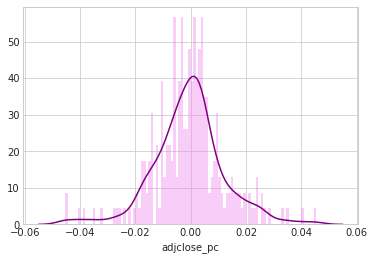

In [19]:
sns.distplot(AAPL['adjclose_pc'].dropna(), bins = 100, kde_kws = {'color':'purple'}, hist_kws = {'color':'violet'})

P(X<=x_a)>=a

P(X>=x_a)>=1-a

## - 0.05 - quantile of pct change

$$ {\displaystyle \mathbb {P} (X\leqslant x_{\alpha })\geqslant \alpha } $$ ,
$${\displaystyle \mathbb {P} (X\geqslant x_{\alpha })\geqslant 1-\alpha .} $$

In [20]:
close_df_pct['AAPL'].quantile(0.05)

-0.019333311626146977

In [21]:
close_df_pct.quantile(0.05)

GOOG   -0.017806
AMZN   -0.020761
AAPL   -0.019333
MSFT   -0.019822
Name: 0.05, dtype: float64

## - Value at Risk using the Monte Carlo method
### more info here: https://www.investopedia.com/articles/07/montecarlo.asp

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

### - applying Monte Carlo method for Google stocks closing price¶

In [22]:
days = 365
dt = 1/days
mu = close_df_pct.mean()['GOOG']
sigma = close_df_pct.std()['GOOG']

In [23]:
def stock_monte_carlo(start_price,days,mu,sigma):
    '''returns simulated price array'''
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [24]:
GOOG.head()

,date,high,low,open,close,volume,adjclose
0,2018-03-29,1043.000000,1002.900024,1011.630005,1035.370972,2202051,1035.370972
1,2018-03-28,1024.229980,980.640015,998.000000,1004.559998,3343000,1004.559998
2,2018-03-27,1064.838989,996.919983,1063.000000,1005.099976,3095300,1005.099976
3,2018-03-26,1055.630005,1008.400024,1046.000000,1053.209961,2665100,1053.209961
4,2018-03-23,1063.359985,1021.219971,1047.030029,1021.570007,2156700,1021.570007


Text(0.5,1,'Monte Carlo Analysis for Google')

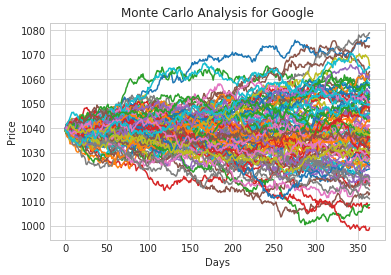

In [25]:
# Get start price from GOOG.head()
start_price = 1039.39

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')


In [26]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


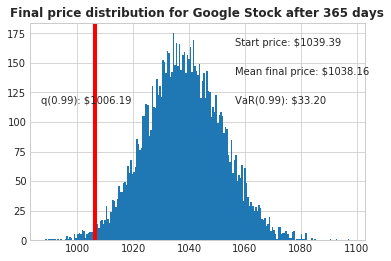

In [27]:
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

# Healthcare companies Stock Market

## Johnson & Johnson

In [28]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

JNJ = data.get_data_yahoo('JNJ',start,end)

In [29]:
JNJ.head()

,date,high,low,open,close,volume,adjclose
0,2018-03-29,128.580002,126.820000,127.970001,128.309998,3754485.0,128.309998
1,2018-03-28,129.020004,127.209999,127.629997,127.449997,6863400.0,127.449997
2,2018-03-27,129.100006,126.389999,127.110001,127.209999,7789900.0,127.209999
3,2018-03-26,127.540001,125.209999,126.410004,127.389999,8358200.0,127.389999
4,2018-03-23,127.800003,124.900002,127.629997,125.099998,8452500.0,125.099998


##  UnitedHealth Group Inc.

In [30]:
UNH = data.get_data_yahoo('UNH',start,end)

In [31]:
UNH.head()

,date,high,low,open,close,volume,adjclose
0,2018-03-29,223.350006,218.199997,219.380005,221.949997,2450254.0,221.949997
1,2018-03-28,219.910004,217.039993,218.889999,218.500000,3178200.0,218.500000
2,2018-03-27,221.949997,216.410004,220.320007,217.960007,3722100.0,217.960007
3,2018-03-26,219.410004,214.699997,215.190002,219.070007,3561300.0,219.070007
4,2018-03-23,217.729996,212.500000,215.750000,212.550003,5741200.0,212.550003


## - corelation between Johnson & Johnson (JNJ) and UnitedHealth Group (UNH) closing price and its percent chage

In [32]:
health_df = pd.concat([JNJ['adjclose'], UNH['adjclose']], axis = 1)
health_df.columns = ['JNJ','UNH']
health_df.head()

,JNJ,UNH
0,128.309998,221.949997
1,127.449997,218.500000
2,127.209999,217.960007
3,127.389999,219.070007
4,125.099998,212.550003


In [33]:
health_df_pct = health_df.pct_change()
health_df_pct.dropna(inplace=True)
health_df_pct.head()

,JNJ,UNH
1,-0.006703,-0.015544
2,-0.001883,-0.002471
3,0.001415,0.005093
4,-0.017976,-0.029762
5,0.018225,0.012515


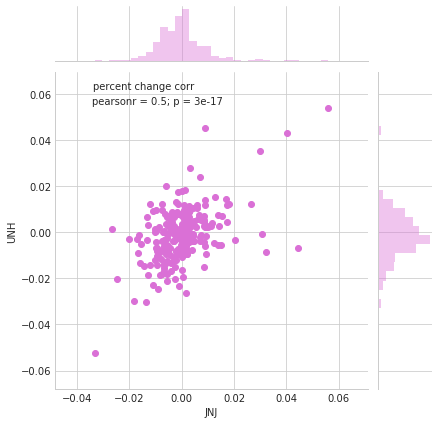

In [34]:
sns.jointplot(health_df_pct.JNJ, health_df_pct.UNH, color='orchid', annot_kws={'title':'percent change corr'})

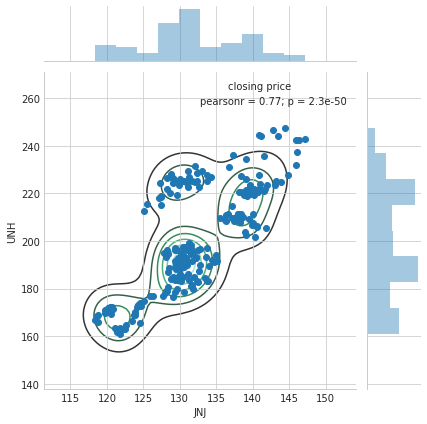

In [35]:
sns.jointplot(health_df.JNJ, 
              health_df.UNH, 
              annot_kws={'title':'closing price'}).plot_joint(sns.kdeplot, zorder=0, n_levels=7)

## - value at risk for Johnson & Johnson

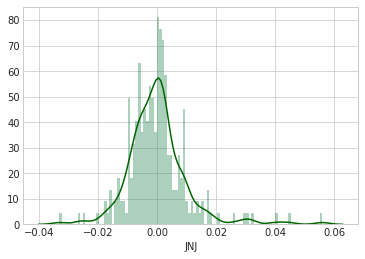

In [36]:
sns.distplot(health_df_pct['JNJ'], bins=100, hist_kws={'color':'seagreen'}, kde_kws={'color':'darkgreen'})

In [37]:
health_df_pct['JNJ'].quantile(0.05)

-0.013043559801746495

## - using the Monte Carlo method

In [38]:
days = 365
dt = 1/days
mu = health_df_pct.mean()['JNJ']
sigma = health_df_pct.std()['JNJ']
JNJ.head()

,date,high,low,open,close,volume,adjclose
0,2018-03-29,128.580002,126.820000,127.970001,128.309998,3754485.0,128.309998
1,2018-03-28,129.020004,127.209999,127.629997,127.449997,6863400.0,127.449997
2,2018-03-27,129.100006,126.389999,127.110001,127.209999,7789900.0,127.209999
3,2018-03-26,127.540001,125.209999,126.410004,127.389999,8358200.0,127.389999
4,2018-03-23,127.800003,124.900002,127.629997,125.099998,8452500.0,125.099998


Text(0.5,1,'Monte Carlo Analysis for Johnson & Johnson')

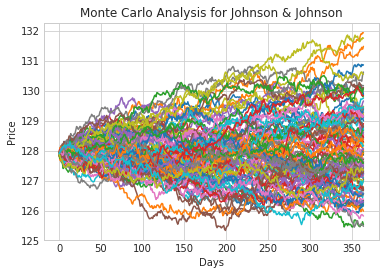

In [39]:
# Get start price from JNJ.head()
start_price = 127.9

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Johnson & Johnson')

In [40]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

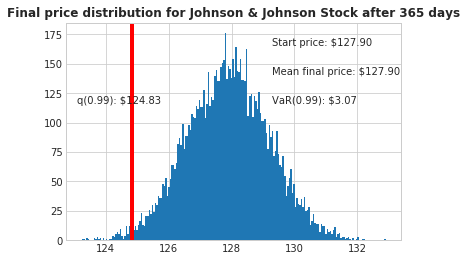

In [41]:
q = np.percentile(simulations, 1)

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Johnson & Johnson Stock after %s days" % days, weight='bold');